In [184]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [118]:
ds = pd.read_csv(r"C:\Users\Tech Pool\Downloads\Files\iris.csv")
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
ds.shape

(150, 5)

In [11]:
ds.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
ds.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [12]:
ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
le = LabelEncoder()
ds['species'] = le.fit_transform(ds['species'])

In [16]:
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


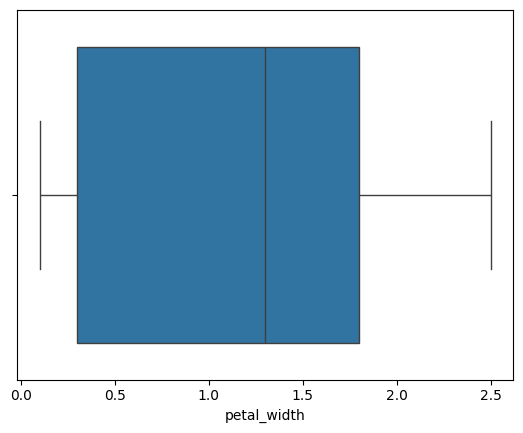

In [20]:
sns.boxplot(x = 'petal_width',data = ds)
plt.show()

In [21]:
x = ds.drop('species',axis=1)
y = ds['species']

In [84]:
x.shape

(150, 4)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Decision Tree

In [40]:
DT_model = DecisionTreeClassifier(random_state=42)

In [41]:
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [151]:
DT_y_pred = DT_model.predict(x_test)
DT_y_pred

array([1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       0, 0, 0, 2, 2, 1, 2, 0])

In [43]:
DT_model.score(x_test,y_test)*100

96.66666666666667

In [69]:
print(cross_val_score(DT_model,x,y,cv=4)*100)

[97.36842105 94.73684211 94.59459459 97.2972973 ]


In [68]:
DT_matrix = confusion_matrix(y_test,DT_y_pred)

In [71]:
labels = ["setosa","versicolor", "virginica"]

In [120]:
disp_dt = ConfusionMatrixDisplay(confusion_matrix=DT_matrix, display_labels=labels)

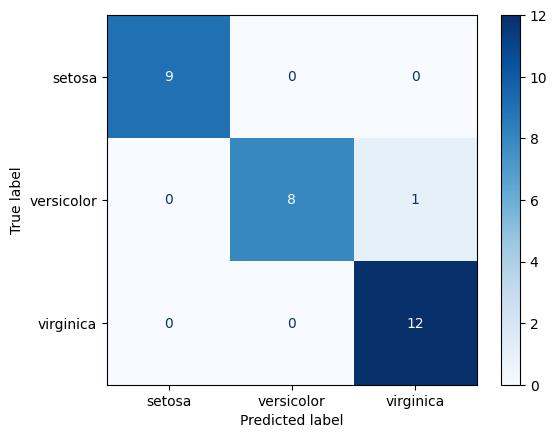

In [121]:
disp_dt.plot(cmap=plt.cm.Blues)
plt.show()

# K Nearest Neighcour

In [161]:
knn_model = KNeighborsClassifier(n_neighbors=8)

In [162]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [163]:
knn_y_pred = knn_model.predict(x_test)
knn_y_pred

array([1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 1, 0])

In [164]:
knn_model.score(x_test,y_test)*100

93.33333333333333

In [165]:
print(cross_val_score(knn_model,x,y,cv=4)*100)

[ 97.36842105 100.          89.18918919  97.2972973 ]


In [166]:
knn_matrix = confusion_matrix(y_test,knn_y_pred)

In [167]:
labels = ["setosa","versicolor", "virginica"]

In [179]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=knn_matrix, display_labels=labels)

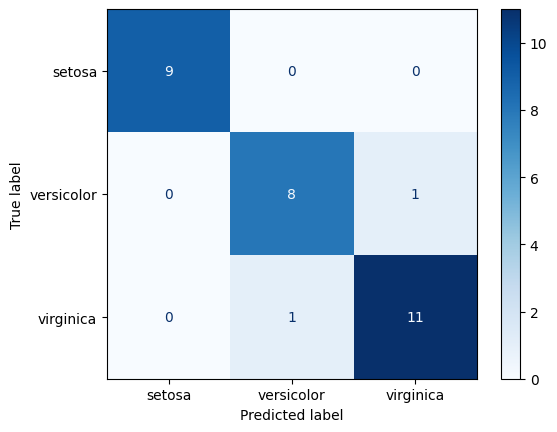

In [180]:
disp_knn.plot(cmap=plt.cm.Blues)

# Suppot Vector Machine

In [170]:
svm_model = SVC(kernel='linear')

In [171]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [172]:
svm_y_pred = svm_model.predict(x_test)
svm_y_pred

array([1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 1, 0])

In [173]:
svm_model.score(x_test,y_test)*100

96.66666666666667

In [174]:
print(cross_val_score(svm_model,x,y,cv=4)*100)

[100.          97.36842105  97.2972973   97.2972973 ]


In [175]:
svm_matrix = confusion_matrix(y_test,svm_y_pred)

In [176]:
labels = ["setosa","versicolor", "virginica"]

In [182]:
disp_svm = ConfusionMatrixDisplay(confusion_matrix=svm_matrix, display_labels=labels)

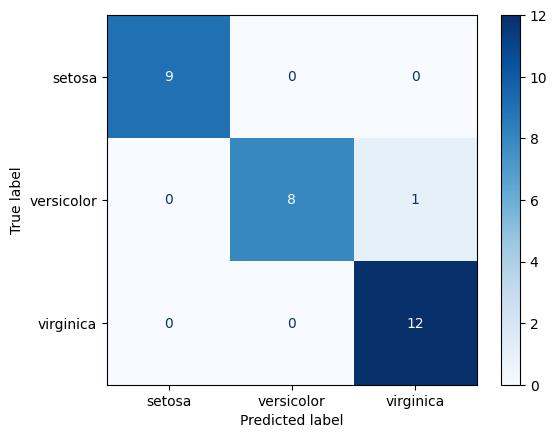

In [183]:
disp_svm.plot(cmap=plt.cm.Blues)

# Naive Bayse Classifier

In [185]:
naive_model = GaussianNB()

In [186]:
naive_model.fit(x_train,y_train)

GaussianNB()

In [188]:
naive_y_pred = naive_model.predict(x_test)
naive_y_pred

array([1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       0, 0, 0, 2, 2, 1, 2, 0])

In [190]:
naive_model.score(x_test,y_test)*100

96.66666666666667

In [192]:
print(cross_val_score(naive_model,x,y,cv=4)*100)

[ 94.73684211  94.73684211  91.89189189 100.        ]


In [193]:
labels = ["setosa","versicolor", "virginica"]

In [194]:
naive_matrix = confusion_matrix(y_test,naive_y_pred)

In [195]:
disp_naive = ConfusionMatrixDisplay(confusion_matrix=naive_matrix,display_labels=labels)

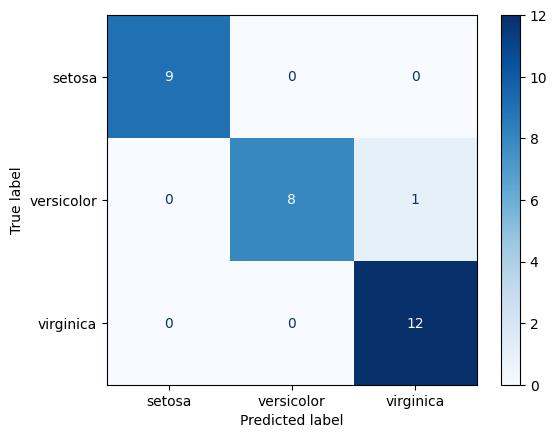

In [196]:
disp_naive.plot(cmap=plt.cm.Blues)